# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [16]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
os.chdir(r'C:\Users\戴嘉萱\Documents\marching learning100day\all data')


### 之前做過的處理

In [36]:
# 讀取資料檔
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [37]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED']=abs(app_train['DAYS_EMPLOYED'])/365
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])/365

In [41]:
app_train['DAYS_EMPLOYED']

0          1.745205
1          3.254795
2          0.616438
3          8.326027
4          8.323288
5          4.350685
6          8.575342
7          1.230137
8               NaN
9          5.531507
10         1.860274
11              NaN
12         7.443836
13         8.295890
14         0.556164
15         3.169863
16         3.608219
17         0.523288
18        21.380822
19         5.583562
20        11.742466
21         4.526027
22        11.797260
23              NaN
24         2.043836
25         9.572603
26         7.200000
27         3.380822
28         4.920548
29         2.767123
            ...    
307481     8.621918
307482     0.619178
307483          NaN
307484     0.898630
307485     1.835616
307486     3.246575
307487          NaN
307488     3.336986
307489     0.783562
307490     5.282192
307491     5.350685
307492     4.432877
307493     6.317808
307494    18.008219
307495    20.378082
307496     5.967123
307497     3.347945
307498    10.106849
307499    23.819178


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

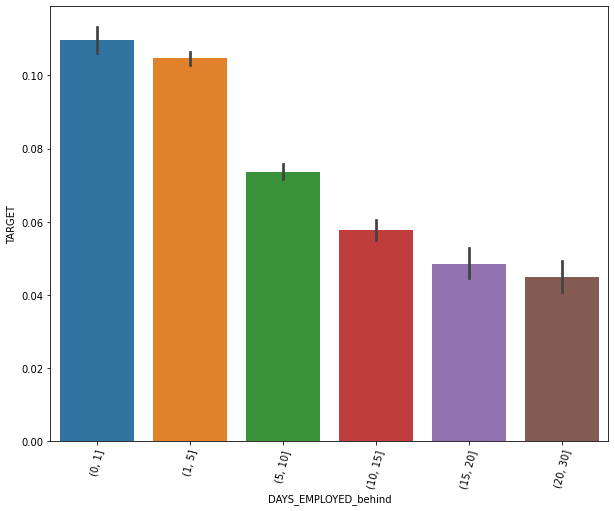

In [45]:
import seaborn as sns
x=[0,1,5,10,15,20,30]
app_train['DAYS_EMPLOYED_behind']=pd.cut(app_train['DAYS_EMPLOYED'],x)
plt.figure(figsize = (10, 8))
plt.xticks(rotation = 75)
sns.barplot(app_train['DAYS_EMPLOYED_behind'], app_train['TARGET'])#bar plot展示的是某種變量分佈的平均值